In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

MAIN_CSS_PATH = Path("data", "wandb_cross_data_main.csv")
FIX_CSS_PATH = Path("data", "wandb_cross_dataset_restaurant_2.csv")
FAILED_RUN = ["wandering-night-1089", 123, "CONLL03", 0.5809868479124372]

In [9]:
main_df = pd.read_csv(MAIN_CSS_PATH)
main_df = main_df.loc[(main_df["dummy"] < 12) | (main_df["dataset"] != "NER_ENGLISH_RESTAURANT")]
main_df.loc[main_df["test_score"] < 0.001, "test_score"] = 0.5809868479124372

In [10]:
restaurant_df = pd.read_csv(FIX_CSS_PATH)
restaurant_df["dummy"] = restaurant_df["dummy"] + 12

In [11]:
df = pd.concat([main_df, restaurant_df])
df.loc[df["dataset"] == "NER_ENGLISH_RESTAURANT", "dataset"] = "MIT ENGLISH RESTAURANT"
df.loc[df["dataset"] == "CONLL03", "dataset"] = "CONLL 2003"
df.loc[df["dataset"] == "WNUT17", "dataset"] = "WNUT 2017"
df = df.sort_values(by=["dataset"]).reset_index(drop=True)
df

,Name,dummy,dataset,test_score
0,warm-sweep-7,6,CONLL 2003,0.570305
1,generous-sweep-11,10,CONLL 2003,0.580987
2,gallant-sweep-10,9,CONLL 2003,0.620793
3,daily-sweep-9,8,CONLL 2003,0.639889
4,pleasant-sweep-8,7,CONLL 2003,0.613872
5,different-sweep-20,19,CONLL 2003,0.606227
6,fluent-sweep-6,5,CONLL 2003,0.541002
7,celestial-sweep-5,4,CONLL 2003,0.550437
8,quiet-sweep-4,3,CONLL 2003,0.577600
9,peach-sweep-3,2,CONLL 2003,0.642889


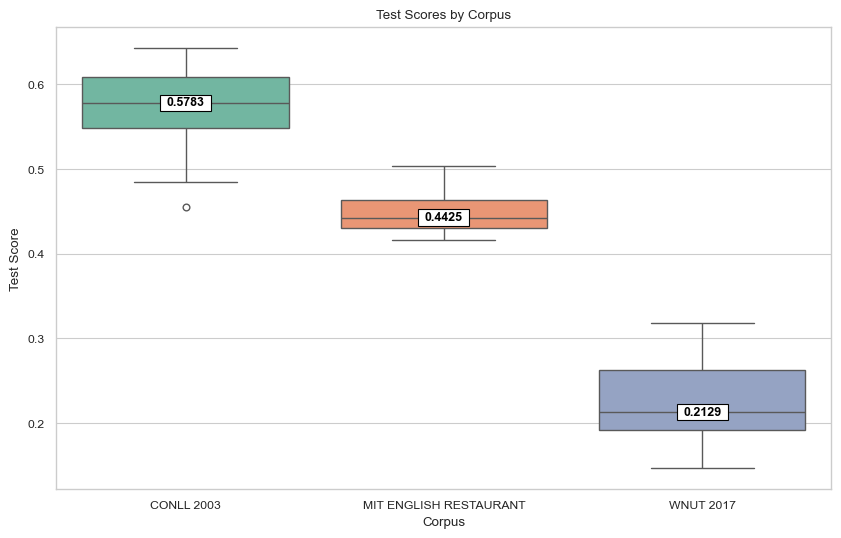

In [12]:
X_SIZE = 10
Y_SIZE = 6

plt.figure(figsize=(X_SIZE, Y_SIZE))

box_plot = sns.boxplot(x='dataset', y='test_score', data=df, hue='dataset')

plt.title('Test Scores by Corpus')
plt.xlabel('Corpus')
plt.ylabel('Test Score')

medians = df.groupby(['dataset'])['test_score'].median()

# Get the current axis
ax = plt.gca()

# Calculate the vertical offset based on the plot size
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
vertical_offset = y_range * 0.01 

x_margin = X_SIZE = 0.025
y_margin = Y_SIZE = 0.0025

for xtick in box_plot.get_xticks():
    median = medians.iloc[xtick]
    text = ax.text(
        xtick, 
        median,
        f'{median:.4f}', 
        horizontalalignment='center',
        verticalalignment='center',
        size=9,
        color='black',
        weight='semibold'
    )
    
    # Get the bounding box of the text
    bbox = text.get_window_extent(renderer=plt.gcf().canvas.get_renderer())
    
    # Convert bbox to data coordinates
    bbox_data = bbox.transformed(ax.transData.inverted())
    
    rect = plt.Rectangle((bbox_data.x0 - x_margin, bbox_data.y0 - y_margin), 
                         bbox_data.width + 2*x_margin, 
                         bbox_data.height + 2*y_margin, 
                         facecolor='white', 
                         edgecolor='black', 
                         # alpha=0.7, 
                         zorder=3)
    
    ax.add_patch(rect)
    
    # Bring the text to the front
    text.set_zorder(4)

save_path = Path(os.getcwd(), "output_figs", "cross_corpus_performance.png")
plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [14]:
# Group the DataFrame by 'dataset' and calculate statistics for 'test_score'
stats = df.groupby('dataset')['test_score'].agg(['max', 'min', 'median', 'mean', 'std'])

# Rename the columns for clarity
stats.columns = ['Highest Score', "Lowest Score", 'Median Score', 'Mean Score', 'Standard Deviation']

# Round the results to 4 decimal places
stats = stats.round(4)
stats

,Highest Score,Lowest Score,Median Score,Mean Score,Standard Deviation
dataset,,,,,
CONLL 2003,0.6429,0.4546,0.5783,0.5742,0.0514
MIT ENGLISH RESTAURANT,0.5037,0.4160,0.4425,0.4475,0.0240
WNUT 2017,0.3181,0.1469,0.2129,0.2278,0.0496


In [15]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_second_max(s, props=''):
    return np.where(s == np.sort(s.values)[-2], props, '')

styled_stats = stats.style.format(precision=4)
styled_stats = styled_stats.apply(highlight_max, props="textbf:--rwrap;", subset=stats.columns[0:-1], axis=0)
styled_stats = styled_stats.apply(highlight_second_max, props="ul:--rwrap;", subset=stats.columns[0:-1], axis=0)
print(styled_stats.to_latex())

\begin{tabular}{lrrrrr}
 & Highest Score & Lowest Score & Median Score & Mean Score & Standard Deviation \\
dataset &  &  &  &  &  \\
CONLL 2003 & \textbf{0.6429} & \textbf{0.4546} & \textbf{0.5783} & \textbf{0.5742} & 0.0514 \\
MIT ENGLISH RESTAURANT & \ul{0.5037} & \ul{0.4160} & \ul{0.4425} & \ul{0.4475} & 0.0240 \\
WNUT 2017 & 0.3181 & 0.1469 & 0.2129 & 0.2278 & 0.0496 \\
\end{tabular}

